# Outline
- [1 - Reading the Clean Data with Feature Columns](#1)
- [2 - Importing DataModeling Libraries](#2)
- [3 - Encoding the categorical columns into Numerics](#3)
- [4 - Principal Component Analysis](#4)
  - [4.1 - 2D PCA](#4.1)
  - [4.2 - 3D PCA](#4.2)
- [5 Data Modeling](#5)
  - [5.1 - LabelEncoding](#5.1)
  - [5.2 - Train-Test-Validation Split](#5.2)
- [6 - Logistic Regression](#6)
   - [6.1 - Reports](#6.1)
   - [6.2 - Confusion Matrix](#6.2)
   - [6.3 - ROC Curve](#6.3)
- [7 - XGBooost Modelling](#7)
   - [7.1 - Reports](#7.1)
   - [7.2 - Confusion Matrix](#7.2)
   - [7.3 - ROC Curve](#7.3)
   - [7.4 - Feature Importance](#7.4)
- [8 - XGBoost Model with SMOTE](#8)
   - [8.1 - Reports](#8.1)
   - [8.2 - Confusion Matrix](#8.2)
   - [8.3 - ROC Curve](#8.3)
   - [8.4 - Feature Importance](#8.4)
- [6 - Random Forest](#9)
   - [9.1 - Reports](#9.1)
   - [9.2 - Confusion Matrix](#9.2)
   - [9.3 - ROC Curve](#9.3)
- [10 - KNN](#10)
   - [10.1 - Reports](#10.1)
   - [10.2 - Confusion Matrix](#10.2)
   - [10.3 - ROC Curve](#10.3)
- [10 - Feature Engineering](#10)
- [11 - Extra HDBScan](#11)


<a name="1"></a>
# 1 - Reading the Cleaned Data with feature columns

In [1]:
import pandas as pd

In [2]:
cali_wildfire = pd.read_csv('csv_data/cali_wildfire_cleaned_with_feature_columns.csv')
df1 = pd.read_csv('csv_data/cali_wildfire_cleaned_with_feature_columns.csv')

cali_wildfire

,DAMAGE,CITY,CALFIREUNI,COUNTY,COMMUNITY,INCIDENTNA,INCIDENTNU,INCIDENTST,VEGCLEARAN,STRUCTURET,...,MEDIUM_VEGETATION_CLEARANCE,HIGH_VEGETATION_CLEARANCE,ROOF_VULNERABILITY,DAMAGE_COST_RATIO,BUILDING_AGE_VEG_LOW,BUILDING_AGE_VEG_MEDIUM,BUILDING_AGE_BIN,quarter,month,year
0,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,2018-11-08,0-30',Mobile Home Double Wide,...,0,0,0,0.228220,118.0,0.0,101-150,4,11,2018
1,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,2018-11-08,0-30',Mobile Home Double Wide,...,0,0,0,0.294907,118.0,0.0,101-150,4,11,2018
2,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,2018-11-08,0-30',Mobile Home Double Wide,...,0,0,0,0.126891,118.0,0.0,101-150,4,11,2018
3,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,2018-11-08,0-30',Mobile Home Double Wide,...,0,0,0,0.215402,118.0,0.0,101-150,4,11,2018
4,Affected (1-9%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,2018-11-08,0-30',Mobile Home Double Wide,...,0,0,0,0.008107,118.0,0.0,101-150,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31661,Destroyed (>50%),Marysville,BTU,YUB,Loma Rica,Cascade,CANEU026269,2017-10-08,60-100',Single Family Residence-Single Story,...,1,0,0,0.978829,0.0,25.0,21-50,4,10,2017
31662,Destroyed (>50%),Marysville,BTU,YUB,Loma Rica,Cascade,CANEU026269,2017-10-08,0-30',Non-habitable-Shop,...,0,0,0,26.352773,NaN,NaN,NaN,4,10,2017
31663,Destroyed (>50%),Marysville,BTU,YUB,Loma Rica,Cascade,CANEU026269,2017-10-08,0-30',Single Family Residence-Single Story,...,0,0,0,14.963263,NaN,NaN,NaN,4,10,2017
31664,Destroyed (>50%),Marysville,BTU,YUB,Loma Rica,Cascade,CANEU026269,2017-10-08,0-30',Mobile Home - Double Wide,...,0,0,0,25.872479,NaN,NaN,NaN,4,10,2017


In [307]:
cali_wildfire_without_feature.columns

Index(['DAMAGE', 'CITY', 'CALFIREUNI', 'COUNTY', 'COMMUNITY', 'INCIDENTNA',
       'INCIDENTNU', 'INCIDENTST', 'VEGCLEARAN', 'STRUCTURET', 'ROOFCONSTR',
       'EAVES', 'VENTSCREEN', 'EXTERIORSI', 'WINDOWPANE', 'TOPOGRAPHY',
       'ASSESSEDIM', 'YEARBUILT', 'LONGITUDE', 'LATITUDE', 'CLAIM',
       'STRUCTURET_STANDARDIZED'],
      dtype='object')

<a name="2"></a>
# 2 -Importing Data Modeling Libraries

## ``` I will  be using 4 ML models as follow: ```

### ```Base Model (Logistic regression)```
### ```XGboost Model ```
### ```XGBoost Model with SMOTE```
### ```Random Forest```
### ```KNN```
`(NOTE: The problem statement is classification based: To Predict damage to building nation-wide)`

In [227]:
## Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, log_loss, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.model_selection import cross_val_score
from sklearn import metrics


import matplotlib.pyplot as plt

In [4]:
cali_wildfire.columns

Index(['DAMAGE', 'CITY', 'CALFIREUNI', 'COUNTY', 'COMMUNITY', 'INCIDENTNA',
       'INCIDENTNU', 'INCIDENTST', 'VEGCLEARAN', 'STRUCTURET', 'ROOFCONSTR',
       'EAVES', 'VENTSCREEN', 'EXTERIORSI', 'WINDOWPANE', 'TOPOGRAPHY',
       'ASSESSEDIM', 'YEARBUILT', 'LONGITUDE', 'LATITUDE', 'CLAIM',
       'STRUCTURET_STANDARDIZED', 'BUILDING_AGE', 'LOW_VEGETATION_CLEARANCE',
       'MEDIUM_VEGETATION_CLEARANCE', 'HIGH_VEGETATION_CLEARANCE',
       'ROOF_VULNERABILITY', 'DAMAGE_COST_RATIO', 'BUILDING_AGE_VEG_LOW',
       'BUILDING_AGE_VEG_MEDIUM', 'BUILDING_AGE_BIN', 'quarter', 'month',
       'year'],
      dtype='object')

<a name="3"></a>
# 3 - Encoding the categorical columns into Numerics

In [6]:
cali_wildfire_without_feature = cali_wildfire.iloc[:,:-12]
cali_wildfire_with_feature = cali_wildfire.copy()

In [7]:
# Apply One-Hot Encoding to all categorical columns
cali_wildfire_without_feature_encoded = pd.get_dummies(cali_wildfire_without_feature)

print(f"Dataset shape after One-Hot Encoding: {cali_wildfire_without_feature_encoded.shape}")


Dataset shape after One-Hot Encoding: (31666, 442)


<a name="4"></a>
# 4. PCA (principal Component analysis)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
# Step 1: Standardize the Data
scaler = StandardScaler()
cali_wildfire_without_feature_encoded_scaled = scaler.fit_transform(cali_wildfire_without_feature_encoded)  # Our one-hot-encoded DataFrame


In [10]:
# Step 2: Apply PCA
pca_2d = PCA(n_components=2)  # 2 components for 2D visualization
principal_components_2d = pca_2d.fit_transform(cali_wildfire_without_feature_encoded_scaled)


# Step 3: Apply PCA for 3D
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(cali_wildfire_without_feature_encoded_scaled)

<a name="4.1"></a>
## 4.1 - 2D PCA Of Wildfire 

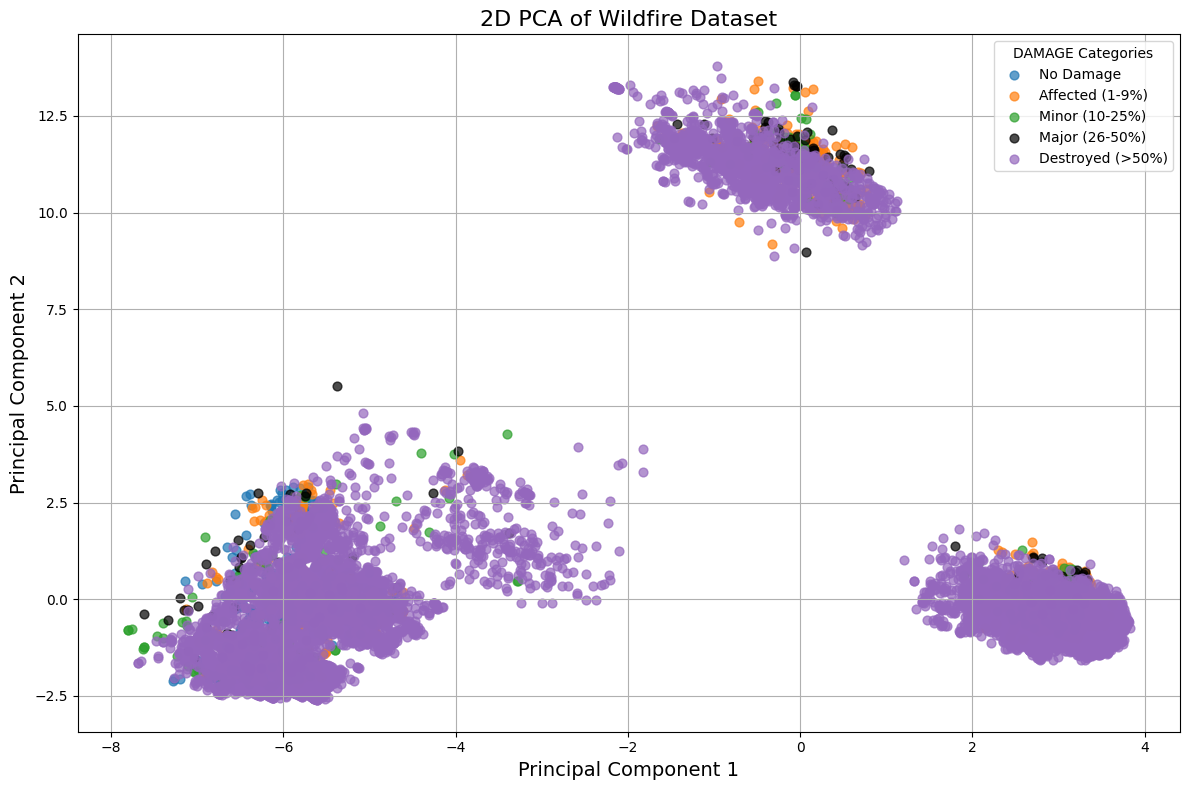

Explained variance ratio: [0.03903139 0.02112922]


In [11]:
# Create DataFrame for PCA results
pca_df_2d = pd.DataFrame(
    data=principal_components_2d,
    columns=['Principal Component 1', 'Principal Component 2']
)
pca_df_2d['DAMAGE'] = cali_wildfire_without_feature['DAMAGE']  # Add the DAMAGE column

# Define damage categories and distinct colors
damage_categories = ['No Damage', 'Affected (1-9%)', 'Minor (10-25%)', 
                      'Major (26-50%)', 'Destroyed (>50%)']

colors = ['#1f77b4',    # Muted blue for dominant class
          '#ff7f0e',    # Safety orange
          '#2ca02c',    # Cooked asparagus green
          'black',    # Brick red
          '#9467bd']

# Plot each damage category in 2D PCA plot
plt.figure(figsize=(12, 8))
for category, color in zip(damage_categories, colors):
    mask = pca_df_2d['DAMAGE'] == category
    plt.scatter(
        pca_df_2d.loc[mask, 'Principal Component 1'],
        pca_df_2d.loc[mask, 'Principal Component 2'],
        color=color,
        label=category,
        alpha=0.7,
        s=40  # Marker size
    )

# Customize the plot
plt.title('2D PCA of Wildfire Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='DAMAGE Categories', loc='best')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca_2d.explained_variance_ratio_)


<a name="4.2"></a>
## 4.2 - 3D PCA Of Wildfire 

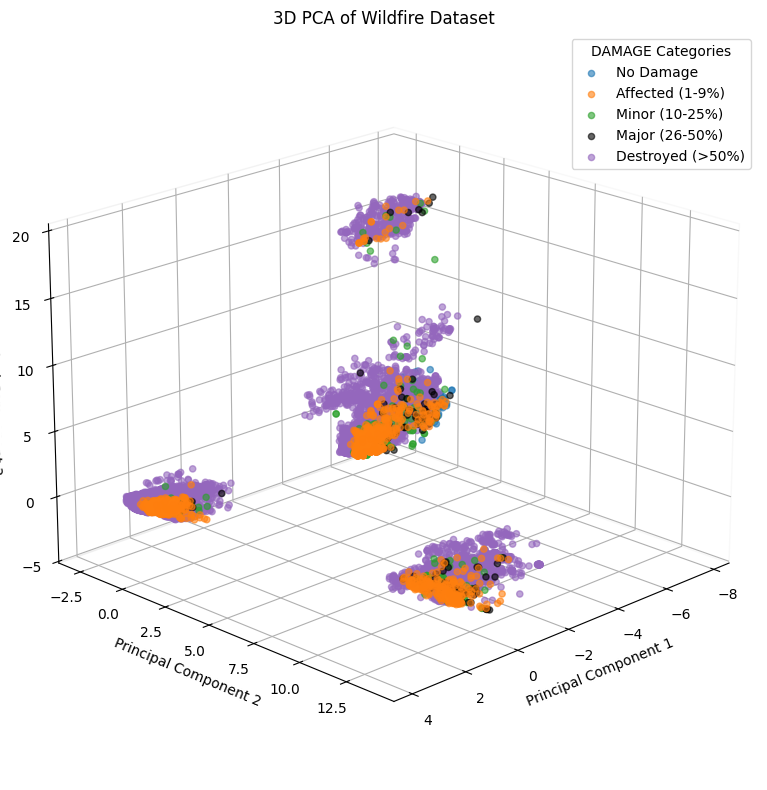

Explained variance ratio: [0.03903139 0.02112922 0.0162963 ]


In [12]:
# Create DataFrame for PCA results
pca_df_3d = pd.DataFrame(
    data=principal_components_3d,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Create the 3D plot with improved visibility
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define damage categories and colors
damage_categories = ['No Damage', 'Affected (1-9%)', 'Minor (10-25%)', 
                    'Major (26-50%)', 'Destroyed (>50%)']
# colors = ['black', 'blue', 'darkorange', 'pink', 'grey']

# Option 2: Optimized for visibility
colors = ['#1f77b4',    # Muted blue for dominant class
          '#ff7f0e',    # Safety orange
          '#2ca02c',    # Cooked asparagus green
          'black',    # Brick red
          '#9467bd']    # Muted purple

# Plot each damage category
for category, color in zip(damage_categories, colors):
    mask = cali_wildfire['DAMAGE'] == category
    ax.scatter(
        pca_df_3d.loc[mask, 'Principal Component 1'],
        pca_df_3d.loc[mask, 'Principal Component 2'],
        pca_df_3d.loc[mask, 'Principal Component 3'],
        c=color,
        s=20,  # Increased point size
        alpha=0.6,  # Adjusted transparency
        label=category
    )

# Customize the plot
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Wildfire Dataset')

# Add legend and grid
ax.legend(title='DAMAGE Categories')
ax.grid(True)

# # Customize the axes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Add view angle for better visualization
ax.view_init(elev=20, azim=45)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Print explained variance ratio
print("Explained variance ratio:", pca_3d.explained_variance_ratio_)


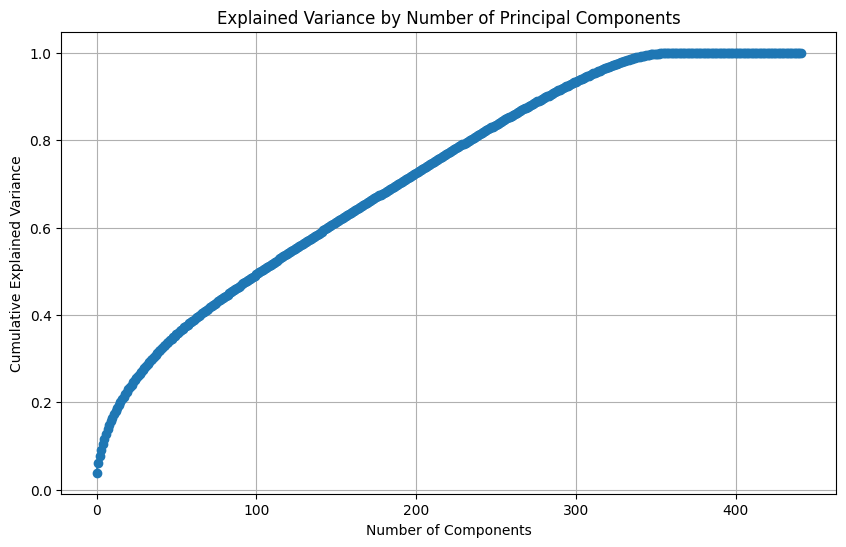

In [13]:
# Step 7: Explained Variance Plot
try:
    pca_full = PCA().fit(cali_wildfire_without_feature_encoded_scaled)
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Principal Components')
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"Error during explained variance plot: {e}")

<a name="5"></a>
# 5 - Model Building 

<a name="5.1"></a>
## 5.1 - Label Encoding and Train - Test - Validation Splitting 

In [243]:
cali_wildfire_without_feature.columns

Index(['DAMAGE', 'CITY', 'CALFIREUNI', 'COUNTY', 'COMMUNITY', 'INCIDENTNA',
       'INCIDENTNU', 'INCIDENTST', 'VEGCLEARAN', 'STRUCTURET', 'ROOFCONSTR',
       'EAVES', 'VENTSCREEN', 'EXTERIORSI', 'WINDOWPANE', 'TOPOGRAPHY',
       'ASSESSEDIM', 'YEARBUILT', 'LONGITUDE', 'LATITUDE', 'CLAIM',
       'STRUCTURET_STANDARDIZED'],
      dtype='object')

In [141]:
cali_wildfire_data_no_target = cali_wildfire_without_feature.drop(['DAMAGE'], axis=1)

In [142]:
# Apply One-Hot Encoding to all categorical columns (for simplicity)
cali_wildfire_without_feature_onehot_encoded_data = pd.get_dummies(cali_wildfire_data_no_target, columns=cali_wildfire_data_no_target.select_dtypes(include=['object']).columns[:])

print(f"Dataset shape after One-Hot Encoding: {cali_wildfire_without_feature_onehot_encoded_data.shape}")


Dataset shape after One-Hot Encoding: (31666, 437)


In [143]:
#LabelEncode target variable for classification
le = LabelEncoder()
cali_wildfire_without_feature_onehot_encoded_data['DAMAGE_ENCODED'] = le.fit_transform(cali_wildfire_without_feature['DAMAGE'])

In [144]:
# Save label encoder mappings to a file
np.save('label_mappings.npy', le.classes_)
print("Label mappings saved successfully.")

Label mappings saved successfully.


In [145]:
# Load the saved mappings
class_names = np.load('label_mappings.npy', allow_pickle=True)
print("Loaded Label Mappings:", class_names)

Loaded Label Mappings: ['Affected (1-9%)' 'Destroyed (>50%)' 'Major (26-50%)' 'Minor (10-25%)'
 'No Damage']


In [146]:
# Split the data into features (X) and target (y) for financial
#A. For Delay_Risk
X1 = cali_wildfire_without_feature_onehot_encoded_data.drop(['DAMAGE_ENCODED'], axis=1)
y1 = cali_wildfire_without_feature_onehot_encoded_data['DAMAGE_ENCODED']

In [147]:
X1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X1.columns]

In [148]:
# # Fix feature names to remove invalid characters for XGBoost
# X_train1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X_train1.columns]
# X_test1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X_test1.columns]

# X_validation1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X_validation1.columns]

<a name="5.2"></a>
## 5.2 - Train - Test - Validation Splitting 

In [281]:
# Split the dataset into training and testing sets (70% train, 30% test)
print('\n Data Shape -----------------------------------\n')
print('Shape:', X1.shape, y1.shape)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=46, stratify=y1)
print('Before Validation Shape:', X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)


# Second split: 75% train, 25% val
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_train1, y_train1, test_size=0.30, random_state=46, stratify=y_train1)
print('After Validation Shape:', X_train1.shape, X_validation1.shape, y_train1.shape, y_validation1.shape)


 Data Shape -----------------------------------

Shape: (31666, 437) (31666,)
Before Validation Shape: (22166, 437) (9500, 437) (22166,) (9500,)
After Validation Shape: (15516, 437) (6650, 437) (15516,) (6650,)


<a name="6"></a>
# 6 - Logistics model

In [151]:
# %%time

# # Initialize the model
# logistic_model = LogisticRegression(solver='saga', max_iter=10000, random_state=46, class_weight='balanced')


# # Custom training function with validation monitoring
# def train_with_validation(model, X_train1, y_train1, X_validation1, y_validation1):
#     # val_scores = []
#     # train_scores = []
    
#     print("Training Progress:")
#     print("-----------------")
    
#     # for epoch in range(epochs):
#     # Fit the model
#     model.fit(X_train1, y_train1)
    
#     # Get probabilities for validation and training sets
#     val_probs = model.predict_proba(X_validation1)
#     train_probs = model.predict_proba(X_train1)
    
#     # Calculate losses
#     val_loss = log_loss(y_validation1, val_probs)
#     train_loss = log_loss(y_train1, train_probs)
    
#     # val_scores.append(val_loss)
#     # train_scores.append(train_loss)
    
#     # print(f"Epoch {epoch+1}/{epochs}:")
#     print(f"Training Log Loss: {train_loss:.6f}")
#     print(f"Validation Log Loss: {val_loss:.6f}")
#     print("-----------------")
    
#     return train_scores, val_scores

# # Train the model
# train_scores, val_scores = train_with_validation(
#     logistic_model, 
#     X_train1, 
#     y_train1, 
#     X_validation1, 
#     y_validation1
# )

In [152]:
%%time 

# Initialize Logistic Regression with warm_start=True and saga solver
logistic_model = LogisticRegression(
    solver='saga', max_iter=1000, warm_start=True, random_state=46, class_weight='balanced'
)

# Custom training function to print losses
def train_with_log_print(model, X_train, y_train, X_validation, y_validation, epochs=10):
    train_losses = []
    val_losses = []

    print("Training Progress:")
    print("-----------------")

    for epoch in range(epochs):
        # Fit model for one epoch
        model.fit(X_train, y_train)

        # Predict probabilities for train and validation sets
        train_probs = model.predict_proba(X_train)
        val_probs = model.predict_proba(X_validation)

        # Calculate log loss for training and validation sets
        train_loss = log_loss(y_train, train_probs)
        val_loss = log_loss(y_validation, val_probs)

        # Store and print losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch + 1}/{epochs}:")
        print(f"Training Log Loss: {train_loss:.6f}")
        print(f"Validation Log Loss: {val_loss:.6f}")
        print("-----------------")

    return train_losses, val_losses

# Train and monitor losses
train_scores, val_scores = train_with_log_print(
    logistic_model,
    X_train1,
    y_train1,
    X_validation1,
    y_validation1,
    epochs=10  # Number of epochs
)


Training Progress:
-----------------


E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 1/10:
Training Log Loss: 0.927288
Validation Log Loss: 0.924228
-----------------


E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 2/10:
Training Log Loss: 0.934816
Validation Log Loss: 0.927094
-----------------


E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 3/10:
Training Log Loss: 0.933726
Validation Log Loss: 0.926090
-----------------


E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 4/10:
Training Log Loss: 0.918310
Validation Log Loss: 0.912075
-----------------
Epoch 5/10:
Training Log Loss: 0.931766
Validation Log Loss: 0.923673
-----------------
Epoch 6/10:
Training Log Loss: 0.926276
Validation Log Loss: 0.918032
-----------------
Epoch 7/10:
Training Log Loss: 0.926020
Validation Log Loss: 0.917770
-----------------
Epoch 8/10:
Training Log Loss: 0.919611
Validation Log Loss: 0.911237
-----------------
Epoch 9/10:
Training Log Loss: 0.919333
Validation Log Loss: 0.910937
-----------------
Epoch 10/10:
Training Log Loss: 0.919316
Validation Log Loss: 0.910920
-----------------
CPU times: total: 17min 50s
Wall time: 17min 58s


In [153]:
# Predcting 
y_pred_logistic = logistic_model.predict(X_test1)

<a name="6.1"></a>
## 6.1 - Reports

In [154]:
# Evaluate the logistic regression model performance
logistic_report = classification_report(y_test1, y_pred_logistic, target_names=le.classes_)
print("Logistic Regression Classification Report:\n", logistic_report)


missing_classes = np.setdiff1d(le.classes_, np.unique(y_pred_logistic))
print(f"Classes not predicted by the model: {missing_classes}")


Logistic Regression Classification Report:
                   precision    recall  f1-score   support

 Affected (1-9%)       0.00      0.00      0.00       377
Destroyed (>50%)       0.99      0.59      0.74      8810
  Major (26-50%)       0.01      0.56      0.01        48
  Minor (10-25%)       0.06      0.22      0.09        93
       No Damage       1.00      0.06      0.11       172

        accuracy                           0.55      9500
       macro avg       0.41      0.29      0.19      9500
    weighted avg       0.94      0.55      0.69      9500

Classes not predicted by the model: ['Affected (1-9%)' 'Destroyed (>50%)' 'Major (26-50%)' 'Minor (10-25%)'
 'No Damage']


E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<a name="6.2"></a>
## 6.2 - Confusion Matrix

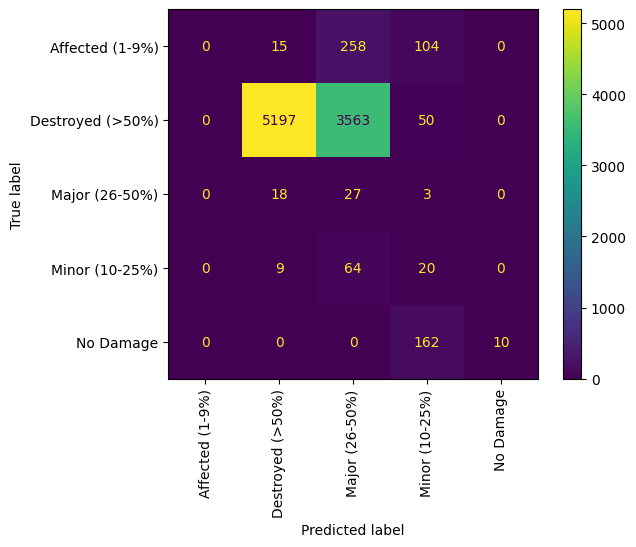

In [156]:
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test1, y_test1, display_labels=le.classes_, cmap='viridis', xticks_rotation=90)

<a name="6.3"></a>
## 6.3 - ROC Curve

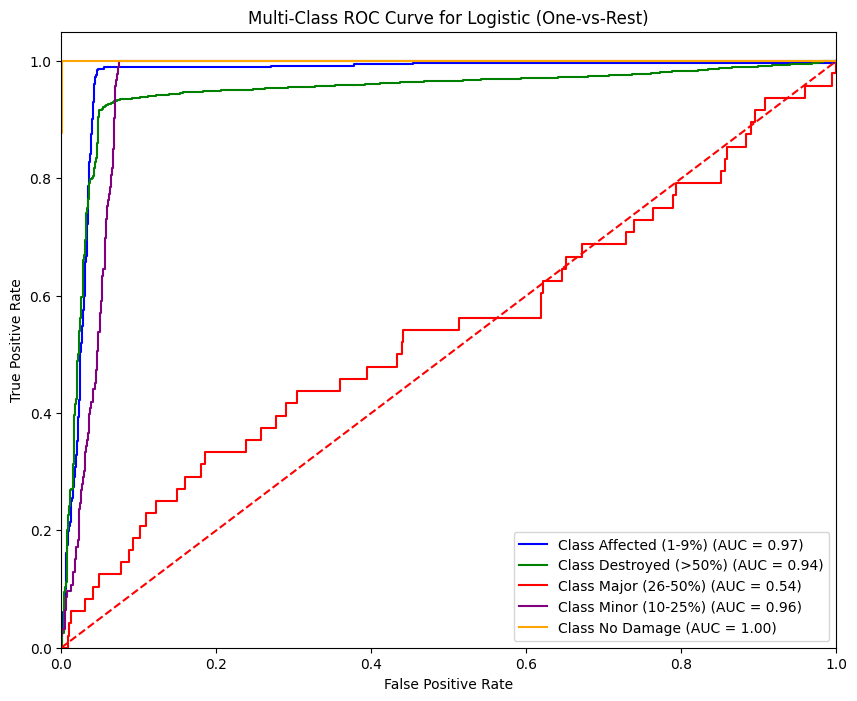

In [199]:
# Binarize the output (convert multi-class labels to binary matrix for ROC curve)
y_test_bin = label_binarize(y_test1, classes=np.arange(len(class_names)))
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_scores_log = logistic_model.predict_proba(X_test1)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores_log[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Logistic (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

<a name="7"></a>
# 7 - XGBoost Modelling

In [158]:
# # Fix feature names to remove invalid characters for XGBoost
# X_train1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X_train1.columns]
# X_test1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X_test1.columns]

# X_validation1.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(',', '') for col in X_validation1.columns]

In [160]:
#Training the XGBoost classifier for multi-class classification

xgb_model1 = XGBClassifier(random_state=46, objective='multi:softmax', num_class=len(y_train1.unique()), eval_metric='aucpr', early_stopping_rounds = 10)
xgb_model2 = XGBClassifier(random_state=46, objective='multi:softmax', num_class=len(y_train1.unique()), eval_metric='mlogloss', early_stopping_rounds = 10)

xgb_model1.fit(X_train1, y_train1, eval_set=[(X_validation1, y_validation1)], verbose=True)

[0]	validation_0-aucpr:0.61498
[1]	validation_0-aucpr:0.62091
[2]	validation_0-aucpr:0.62621
[3]	validation_0-aucpr:0.62421
[4]	validation_0-aucpr:0.62767
[5]	validation_0-aucpr:0.62967
[6]	validation_0-aucpr:0.62945
[7]	validation_0-aucpr:0.63360
[8]	validation_0-aucpr:0.63104
[9]	validation_0-aucpr:0.63365
[10]	validation_0-aucpr:0.63513
[11]	validation_0-aucpr:0.63708
[12]	validation_0-aucpr:0.63657
[13]	validation_0-aucpr:0.63573
[14]	validation_0-aucpr:0.63815
[15]	validation_0-aucpr:0.63896
[16]	validation_0-aucpr:0.64038
[17]	validation_0-aucpr:0.64060
[18]	validation_0-aucpr:0.63965
[19]	validation_0-aucpr:0.64007
[20]	validation_0-aucpr:0.64018
[21]	validation_0-aucpr:0.63983
[22]	validation_0-aucpr:0.64161
[23]	validation_0-aucpr:0.64288
[24]	validation_0-aucpr:0.64283
[25]	validation_0-aucpr:0.64341
[26]	validation_0-aucpr:0.64278
[27]	validation_0-aucpr:0.64216
[28]	validation_0-aucpr:0.64006
[29]	validation_0-aucpr:0.63992
[30]	validation_0-aucpr:0.64029
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [161]:
xgb_model2.fit(X_train1, y_train1, eval_set=[(X_validation1, y_validation1)], verbose=True)


[0]	validation_0-mlogloss:0.96571
[1]	validation_0-mlogloss:0.67010
[2]	validation_0-mlogloss:0.48691
[3]	validation_0-mlogloss:0.36406
[4]	validation_0-mlogloss:0.27837
[5]	validation_0-mlogloss:0.21749
[6]	validation_0-mlogloss:0.17411
[7]	validation_0-mlogloss:0.14236
[8]	validation_0-mlogloss:0.11948
[9]	validation_0-mlogloss:0.10272
[10]	validation_0-mlogloss:0.09047
[11]	validation_0-mlogloss:0.08122
[12]	validation_0-mlogloss:0.07473
[13]	validation_0-mlogloss:0.06995
[14]	validation_0-mlogloss:0.06621
[15]	validation_0-mlogloss:0.06361
[16]	validation_0-mlogloss:0.06157
[17]	validation_0-mlogloss:0.06021
[18]	validation_0-mlogloss:0.05916
[19]	validation_0-mlogloss:0.05837
[20]	validation_0-mlogloss:0.05764
[21]	validation_0-mlogloss:0.05722
[22]	validation_0-mlogloss:0.05670
[23]	validation_0-mlogloss:0.05641
[24]	validation_0-mlogloss:0.05628
[25]	validation_0-mlogloss:0.05606
[26]	validation_0-mlogloss:0.05603
[27]	validation_0-mlogloss:0.05631
[28]	validation_0-mlogloss:0.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [162]:
# Predicting
y_pred_xgboost1 = xgb_model1.predict(X_test1)
y_pred_xgboost2 = xgb_model2.predict(X_test1)


# Evaluating
xgboost_accuracy1 = accuracy_score(y_test1, y_pred_xgboost1)
xgboost_report1 = classification_report(y_test1, y_pred_xgboost1)

xgboost_accuracy2 = accuracy_score(y_test1, y_pred_xgboost2)
xgboost_report2 = classification_report(y_test1, y_pred_xgboost2)

<a name="7.1"></a>
## 7.1 - Reports

In [221]:
print(f'xgboost_report1: ====================================\n{xgboost_report1} \n\n xgboost_accuracy1: ============================================\n{xgboost_accuracy1}')

print(f'xgboost_report2: ====================================\n{xgboost_report2} \n\n xgboost_accuracy2: ============================================\n{xgboost_accuracy2}')


xgboost_report1: ====================================
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       377
           1       0.99      1.00      1.00      8810
           2       0.29      0.04      0.07        48
           3       0.26      0.08      0.12        93
           4       0.97      0.98      0.97       172

    accuracy                           0.98      9500
   macro avg       0.66      0.61      0.60      9500
weighted avg       0.98      0.98      0.98      9500
 

 xgboost_accuracy1: ============================================
0.9822105263157894
xgboost_report2: ====================================
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       377
           1       0.99      1.00      1.00      8810
           2       0.17      0.02      0.04        48
           3       0.29      0.09      0.13        93
           4       0.97      0.98      0.97   

<a name="7.2"></a>
## 7.2 - Confusion Matrix

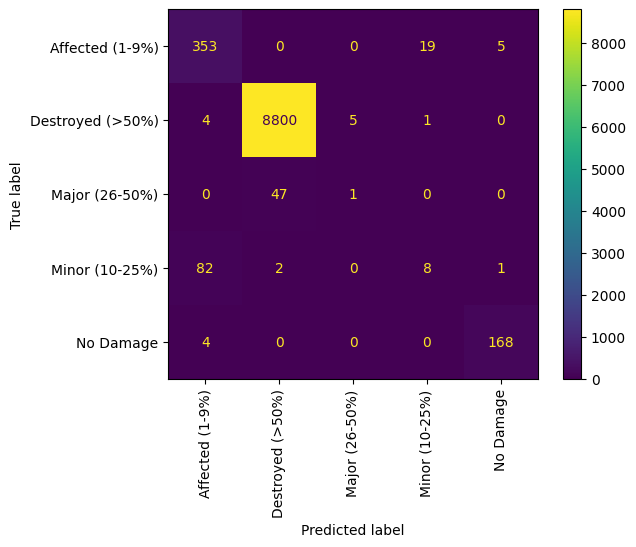

In [222]:
# Display confusion matrix for validation set predictions
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred_xgboost2, display_labels=le.classes_, cmap='viridis', xticks_rotation=90)

In [223]:
print("Length of y_test1:", len(y_test1))
print("Length of y_pred_xgboost1:", len(y_pred_xgboost1))
print("First few elements of y_pred_xgboost1:", y_pred_xgboost1[:10])
print("First few elements of y_test1:\n\n",y_test1[:10])

Length of y_test1: 9500
Length of y_pred_xgboost1: 9500
First few elements of y_pred_xgboost1: [1 1 1 1 1 1 1 1 0 1]
First few elements of y_test1:

 6799     1
2491     1
29473    1
19421    1
13026    1
3841     1
2238     1
25308    1
5523     0
532      1
Name: DAMAGE_ENCODED, dtype: int32


In [224]:
import numpy as np

# Get class distribution of predicted labels
unique_classes, counts = np.unique(y_pred_xgboost1, return_counts=True)

# Convert numerical labels to class names
predicted_class_distribution = {class_names[label]: count for label, count in zip(unique_classes, counts)}

# Print the class distribution with names
print("Predicted Class Distribution with Class Names:\n", predicted_class_distribution)

# Verify the total count equals 9500
print("Total number of predictions:", sum(counts))


Predicted Class Distribution with Class Names:
 {'Affected (1-9%)': 445, 'Destroyed (>50%)': 8848, 'Major (26-50%)': 7, 'Minor (10-25%)': 27, 'No Damage': 173}
Total number of predictions: 9500


<a name="7.3"></a>
## 7.3 - ROC Curve

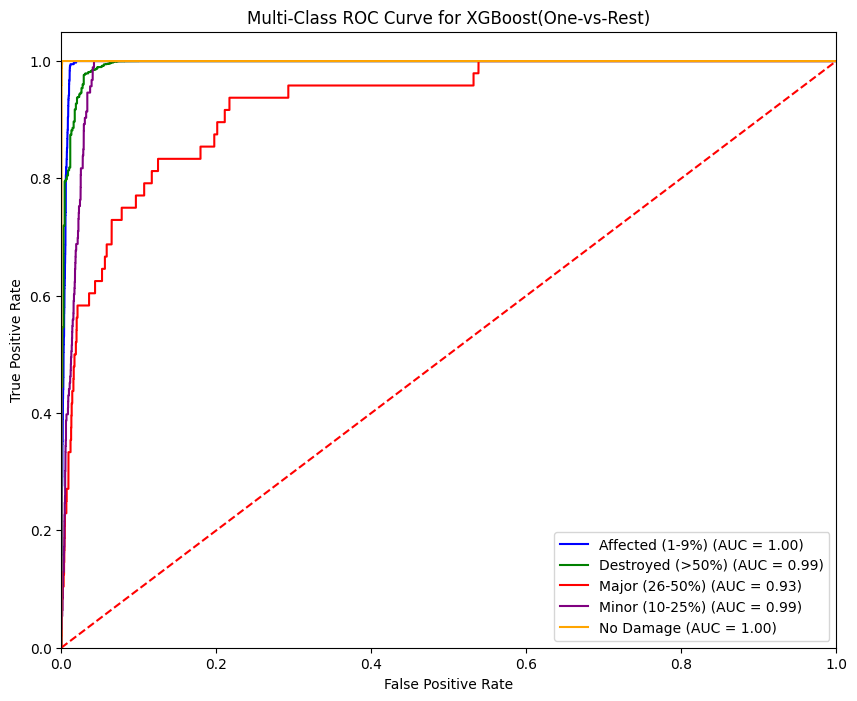

In [225]:
# Binarize the output (convert multi-class labels to binary matrix for ROC curve)
y_test_bin = label_binarize(y_test1, classes=np.arange(len(class_names)))
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_scores_xgb = xgb_model2.predict_proba(X_test1)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for XGBoost(One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
<a name="7.1"></a>
## 7.1 - Reports

Top 10 Important Features:
                                            Feature  Importance
3                                             CLAIM    0.168481
75                                   CALFIREUNI_LNU    0.099559
112                                COMMUNITY_Concow    0.043204
198                                INCIDENTNA_Atlas    0.018689
298                              TOPOGRAPHY_Unknown    0.016415
264                              ROOFCONSTR_Asphalt    0.014457
277                                   EAVES_Unknown    0.013737
278                   VENTSCREEN_Mesh Screen = 1/8"    0.012357
171                           COMMUNITY_Residential    0.011817
216                         INCIDENTNU_CALNU 010104    0.011788
88                                   COUNTY_Ventura    0.011225
210                           INCIDENTNA_Tubbs Fire    0.011181
259  STRUCTURET_Single Family Residence Multi Story    0.010626
432           STRUCTURET_STANDARDIZED_Non-habitable    0.010185
63           

<Figure size 1000x600 with 0 Axes>

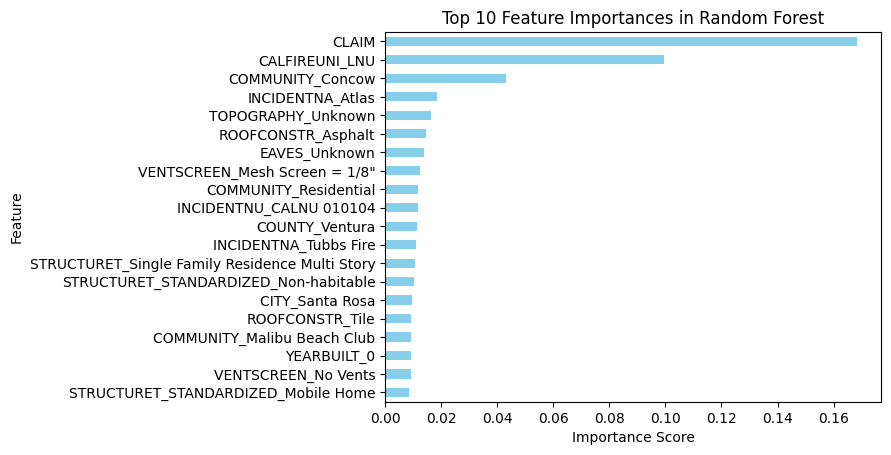

In [231]:
# Get feature importances from the Random Forest model
feature_importances = xgb_model2.feature_importances_
feature_names = X_train1.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top 10 Important Features:")
print(feature_importance_df.head(20))

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance_df.head(20).plot(
    kind='barh', x='Feature', y='Importance', legend=False, color='skyblue'
)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


<a name="8"></a>
# 8 - XGBoost with SMOTE

In [188]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=45)
X_train1_resampled1, y_train1_resampled1 = smote.fit_resample(X_train1, y_train1)


# Check the distribution after applying SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train1_resampled1))


print("Original training set shape:", X_train1.shape, y_train1.shape)
print("Resampled training set shape:", X_train1_resampled1.shape, y_train1_resampled1.shape)

Class distribution after SMOTE: Counter({1: 14390, 4: 14390, 3: 14390, 0: 14390, 2: 14390})
Original training set shape: (15516, 437) (15516,)
Resampled training set shape: (71950, 437) (71950,)


In [190]:

#Training the XGBoost classifier for multi-class classification

xgb_model_smote1 = XGBClassifier(random_state=46, objective='multi:softmax', num_class=len(y_train1.unique()), eval_metric='mlogloss', early_stopping_rounds = 10)
xgb_model_smote1.fit(X_train1, y_train1, eval_set=[(X_validation1, y_validation1)], verbose=True)


[0]	validation_0-mlogloss:0.96571
[1]	validation_0-mlogloss:0.67010
[2]	validation_0-mlogloss:0.48691
[3]	validation_0-mlogloss:0.36406
[4]	validation_0-mlogloss:0.27837
[5]	validation_0-mlogloss:0.21749
[6]	validation_0-mlogloss:0.17411
[7]	validation_0-mlogloss:0.14236
[8]	validation_0-mlogloss:0.11948
[9]	validation_0-mlogloss:0.10272
[10]	validation_0-mlogloss:0.09047
[11]	validation_0-mlogloss:0.08122
[12]	validation_0-mlogloss:0.07473
[13]	validation_0-mlogloss:0.06995
[14]	validation_0-mlogloss:0.06621
[15]	validation_0-mlogloss:0.06361
[16]	validation_0-mlogloss:0.06157
[17]	validation_0-mlogloss:0.06021
[18]	validation_0-mlogloss:0.05916
[19]	validation_0-mlogloss:0.05837
[20]	validation_0-mlogloss:0.05764
[21]	validation_0-mlogloss:0.05722
[22]	validation_0-mlogloss:0.05670
[23]	validation_0-mlogloss:0.05641
[24]	validation_0-mlogloss:0.05628
[25]	validation_0-mlogloss:0.05606
[26]	validation_0-mlogloss:0.05603
[27]	validation_0-mlogloss:0.05631
[28]	validation_0-mlogloss:0.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [191]:
# xgb_model_smote2 = XGBClassifier(random_state=46, objective='multi:softmax', num_class=len(y_train1.unique()), eval_metric='mlogloss', early_stopping_rounds = 10)
# xgb_model_smote2.fit(X_train1, y_train1, eval_set=[(X_validation1, y_validation1)], verbose=True)


In [192]:
# Predicting
y_pred_xgboost_smote1 = xgb_model_smote1.predict(X_test1)
# y_pred_xgboost_smote2 = xgb_model_smote2.predict(X_test1)


# Evaluating
xgboost_accuracy_smote1 = accuracy_score(y_test1, y_pred_xgboost_smote1)
xgboost_report_smote1 = classification_report(y_test1, y_pred_xgboost_smote1)

# xgboost_accuracy_smote2 = accuracy_score(y_test1, y_pred_xgboost_smote2)
# xgboost_report_smote2 = classification_report(y_test1, y_pred_xgboost_smote2)

<a name="8.1"></a>
## 8.1 - Reports

In [257]:
print(f'xgboost_report_smote1: ====================================\n{xgboost_report_smote1} \n\n xgboost_accuracy_smote1: ============================================\n{xgboost_accuracy_smote1}\n\n')

xgboost_report_smote1: ====================================
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       377
           1       0.99      1.00      1.00      8810
           2       0.17      0.02      0.04        48
           3       0.29      0.09      0.13        93
           4       0.97      0.98      0.97       172

    accuracy                           0.98      9500
   macro avg       0.64      0.60      0.60      9500
weighted avg       0.97      0.98      0.98      9500
 

 xgboost_accuracy_smote1: ============================================
0.9821052631578947




<a name="8.2"></a>
## 8.2 - Confusion Matrix

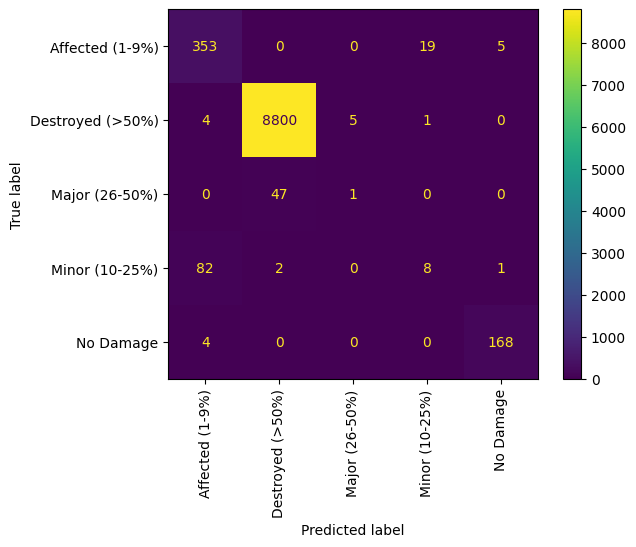

In [258]:
# Display confusion matrix for validation set predictions
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred_xgboost_smote1, display_labels=le.classes_, cmap='viridis', xticks_rotation=90)

<a name="8.3"></a>
## 8.3 - ROC Curve

In [195]:
import numpy as np

# Get class distribution of predicted labels
unique_classes1, counts1 = np.unique(y_pred_xgboost_smote1, return_counts=True)
unique_classes2, counts2 = np.unique(y_pred_xgboost_smote2, return_counts=True)

# Convert numerical labels to class names
predicted_class_distribution_smote1 = {class_names[label]: count for label, count in zip(unique_classes1, counts1)}
predicted_class_distribution_smote2 = {class_names[label]: count for label, count in zip(unique_classes2, counts2)}

# Print the class distribution with names
print("Predicted Class Distribution with Class Names:\n", predicted_class_distribution_smote1)
print("Predicted Class Distribution with Class Names:\n", predicted_class_distribution_smote2)

# Verify the total count equals 9500
print("Total number of predictions:", sum(counts1))
print("Total number of predictions:", sum(counts2))


Predicted Class Distribution with Class Names:
 {'Affected (1-9%)': 443, 'Destroyed (>50%)': 8849, 'Major (26-50%)': 6, 'Minor (10-25%)': 28, 'No Damage': 174}
Predicted Class Distribution with Class Names:
 {'Affected (1-9%)': 443, 'Destroyed (>50%)': 8849, 'Major (26-50%)': 6, 'Minor (10-25%)': 28, 'No Damage': 174}
Total number of predictions: 9500
Total number of predictions: 9500


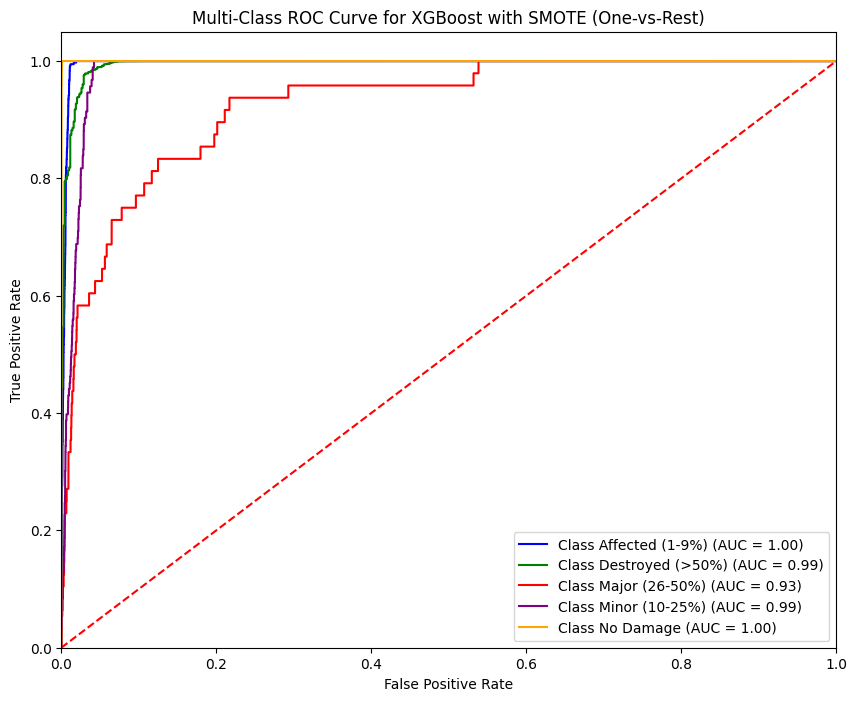

In [220]:
# Binarize the output (convert multi-class labels to binary matrix for ROC curve)
y_test_bin = label_binarize(y_test1, classes=np.arange(len(class_names)))
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_scores_SMOTE = xgb_model_smote2.predict_proba(X_test1)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores_SMOTE[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for XGBoost with SMOTE (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

<a name="9"></a>
# 9 - Random Forest

In [212]:
%%time
#Training the Random Forest classifier for multi-class classification
randomforest_model1 = RandomForestClassifier(n_estimators=100, random_state=46, class_weight='balanced', verbose=1)
randomforest_model1.fit(X_train1, y_train1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s


CPU times: total: 3.75 s
Wall time: 3.77 s


RandomForestClassifier(class_weight='balanced', random_state=46, verbose=1)

In [213]:
# Predict on the test set
y_pred_rf1 = randomforest_model1.predict(X_test1)

# Evaluating
rf_accuracy1 = accuracy_score(y_test1, y_pred_rf1)
rf_report1 = classification_report(y_test1, y_pred_rf1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


<a name="9.1"></a>
## 9.1 - Reports

In [214]:
print(f'RandomForest_Accuracy1: ====================================\n{rf_accuracy1} \n\n RandomForest_Report1: ============================================\n{rf_report1}\n\n')


RandomForest_Accuracy1: ====================================
0.9709473684210527 

 RandomForest_Report1: ============================================
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       377
           1       0.98      1.00      0.99      8810
           2       0.62      0.10      0.18        48
           3       0.40      0.04      0.08        93
           4       0.96      0.91      0.93       172

    accuracy                           0.97      9500
   macro avg       0.76      0.55      0.58      9500
weighted avg       0.96      0.97      0.96      9500





<a name="9.2"></a>
## 9.2 - Confusion Matrix

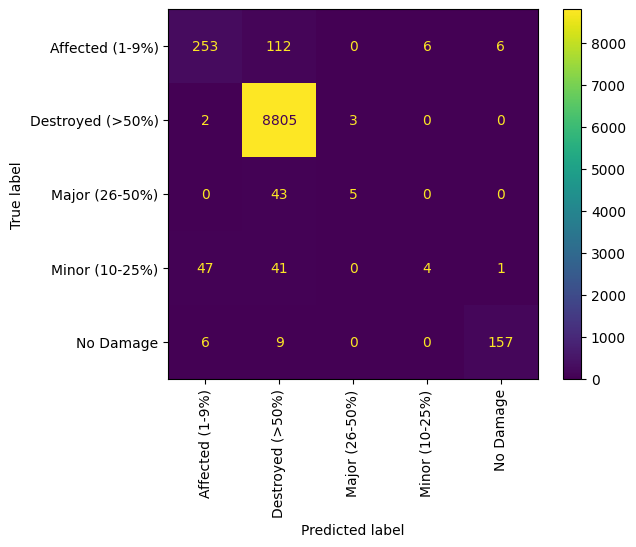

In [216]:
# Display confusion matrix for validation set predictions
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred_rf1, display_labels=le.classes_, cmap='viridis', xticks_rotation=90)

<a name="9.3"></a>
## 9.3 - ROC Curve

In [217]:
import numpy as np

# Get class distribution of predicted labels
unique_classes1, counts1 = np.unique(y_pred_rf1, return_counts=True)

# Convert numerical labels to class names
predicted_class_distribution_randomforest1 = {class_names[label]: count for label, count in zip(unique_classes1, counts1)}

# Print the class distribution with names
print("Predicted Class Distribution with Class Names:\n", predicted_class_distribution_randomforest1)

# Verify the total count equals 9500
print("Total number of predictions:", sum(counts1))

Predicted Class Distribution with Class Names:
 {'Affected (1-9%)': 308, 'Destroyed (>50%)': 9010, 'Major (26-50%)': 8, 'Minor (10-25%)': 10, 'No Damage': 164}
Total number of predictions: 9500


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


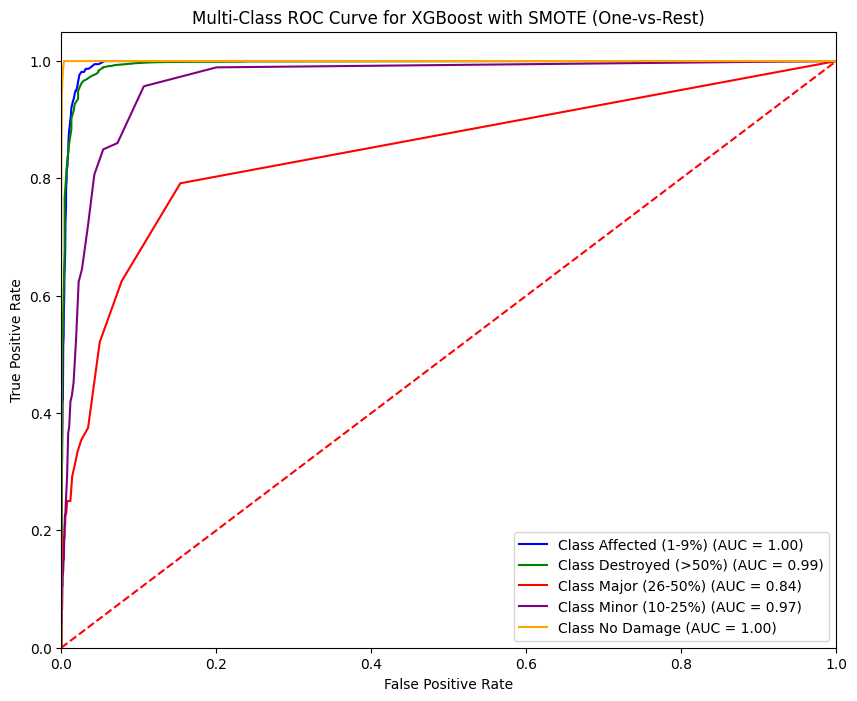

In [219]:
# Binarize the output (convert multi-class labels to binary matrix for ROC curve)
y_test_bin = label_binarize(y_test1, classes=np.arange(len(class_names)))
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_scores_rf = randomforest_model1.predict_proba(X_test1)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for XGBoost with SMOTE (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

<a name="9.4"></a>
## 9.4 - Feature Importance

Top 10 Important Features:
                                             Feature  Importance
3                                              CLAIM    0.187970
1                                          LONGITUDE    0.061276
2                                           LATITUDE    0.057276
0                                         ASSESSEDIM    0.050335
198                                 INCIDENTNA_Atlas    0.031212
277                                    EAVES_Unknown    0.025346
217                           INCIDENTNU_CALNU010046    0.019803
276                                 EAVES_Unenclosed    0.013941
285                           EXTERIORSI_Combustible    0.012728
84                                        COUNTY_NAP    0.012621
289                            WINDOWPANE_Multi Pane    0.010934
294                           TOPOGRAPHY_Flat Ground    0.010889
273                                   EAVES_Enclosed    0.010752
297                                 TOPOGRAPHY_Slope    0.01048

<Figure size 1000x600 with 0 Axes>

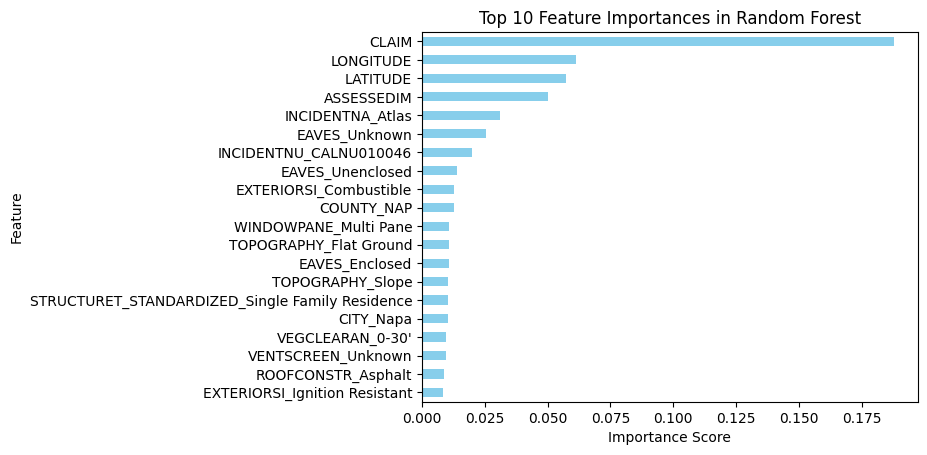

In [230]:
# Get feature importances from the Random Forest model
feature_importances = randomforest_model1.feature_importances_
feature_names = X_train1.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top 10 Important Features:")
print(feature_importance_df.head(20))

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance_df.head(20).plot(
    kind='barh', x='Feature', y='Importance', legend=False, color='skyblue'
)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


##

<a name="10"></a>
# 10 - KNN

In [228]:
# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [233]:
%%time

# 1. Perform cross-validation for different `k` values
neighbors = list(range(1, 50, 2))  # Odd values of `k` to avoid ties
cv_scores = []  # Store cross-validation accuracy scores

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train1, y_train1, cv=6, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

CPU times: total: 5min 39s
Wall time: 1min 54s


In [234]:
# 2. Calculate misclassification error
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

# Create DataFrame to display results
result = {"KNN value": neighbors, "Accuracy": cv_scores, "Misclassification Error": MSE}
knn_result = pd.DataFrame(data=result)
print(knn_result)


The optimal number of neighbors is 5
    KNN value  Accuracy  Misclassification Error
0           1  0.972351                 0.027649
1           3  0.977958                 0.022042
2           5  0.978925                 0.021075
3           7  0.978538                 0.021462
4           9  0.978345                 0.021655
5          11  0.978087                 0.021913
6          13  0.977765                 0.022235
7          15  0.976669                 0.023331
8          17  0.976605                 0.023395
9          19  0.976347                 0.023653
10         21  0.975445                 0.024555
11         23  0.975058                 0.024942
12         25  0.974349                 0.025651
13         27  0.973769                 0.026231
14         29  0.973060                 0.026940
15         31  0.971900                 0.028100
16         33  0.971062                 0.028938
17         35  0.970998                 0.029002
18         37  0.970160         

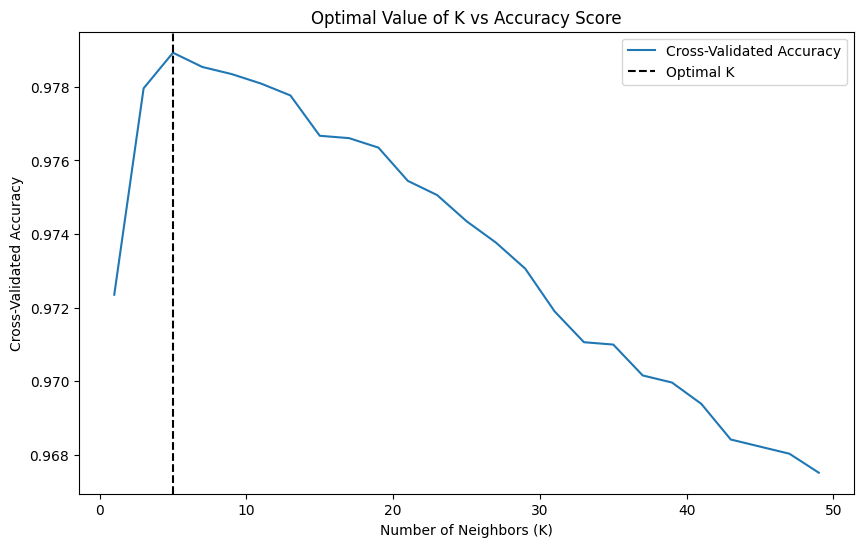

In [235]:
# 3. Plot cross-validation accuracy vs. `k`
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, label='Cross-Validated Accuracy')
plt.axvline(x=optimal_k, color='k', linestyle='--', label='Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Value of K vs Accuracy Score')
plt.legend()
plt.show()

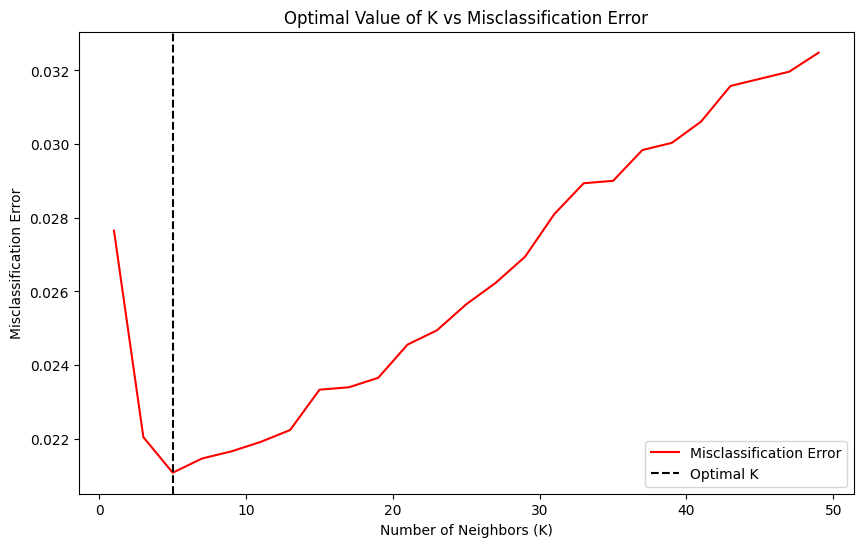

In [236]:
# 4. Plot misclassification error vs. `k`
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE, label='Misclassification Error', color='red')
plt.axvline(x=optimal_k, color='k', linestyle='--', label='Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Misclassification Error')
plt.title('Optimal Value of K vs Misclassification Error')
plt.legend()
plt.show()

In [237]:
# 5. Train the KNN model with the optimal `k`
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train1, y_train1)

KNeighborsClassifier()

In [238]:
# 6. Predict on the test set
y_pred_knn_test = knn_optimal.predict(X_test1)

<a name="10.1"></a>
## 10.1 - Reports

In [239]:
# 7. Evaluate performance on the test set
knn_test_accuracy = accuracy_score(y_test1, y_pred_knn_test)
knn_test_report = classification_report(y_test1, y_pred_knn_test)
print(f"Test Report:\n{knn_test_report}\nTest Accuracy: {knn_test_accuracy}")

Test Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       377
           1       0.99      1.00      1.00      8810
           2       0.00      0.00      0.00        48
           3       0.33      0.05      0.09        93
           4       0.88      0.90      0.89       172

    accuracy                           0.98      9500
   macro avg       0.59      0.57      0.56      9500
weighted avg       0.97      0.98      0.97      9500

Test Accuracy: 0.9792631578947368


E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\NorthWest Data Test\.assessment\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<a name="10.2"></a>
## 10.2 - Confusion Matrix

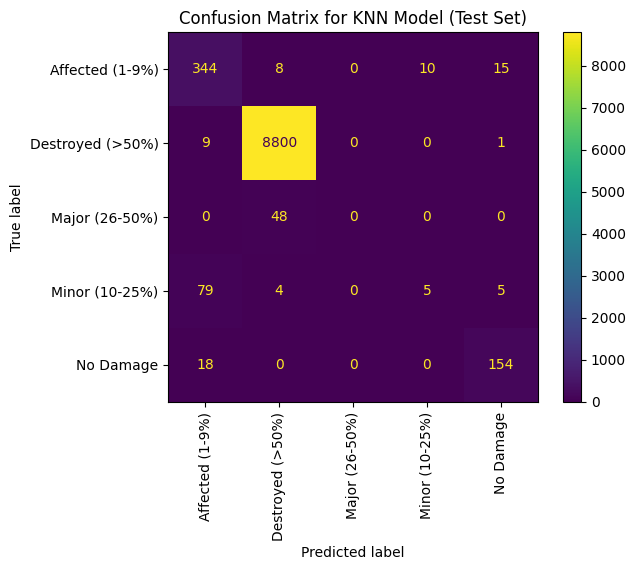

In [240]:
# 8. Display confusion matrix for test set predictions
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred_knn_test, display_labels=le.classes_, cmap='viridis', xticks_rotation=90)
plt.title("Confusion Matrix for KNN Model (Test Set)")
plt.show()


<a name="10.3"></a>
## 10.3 - ROC Curve

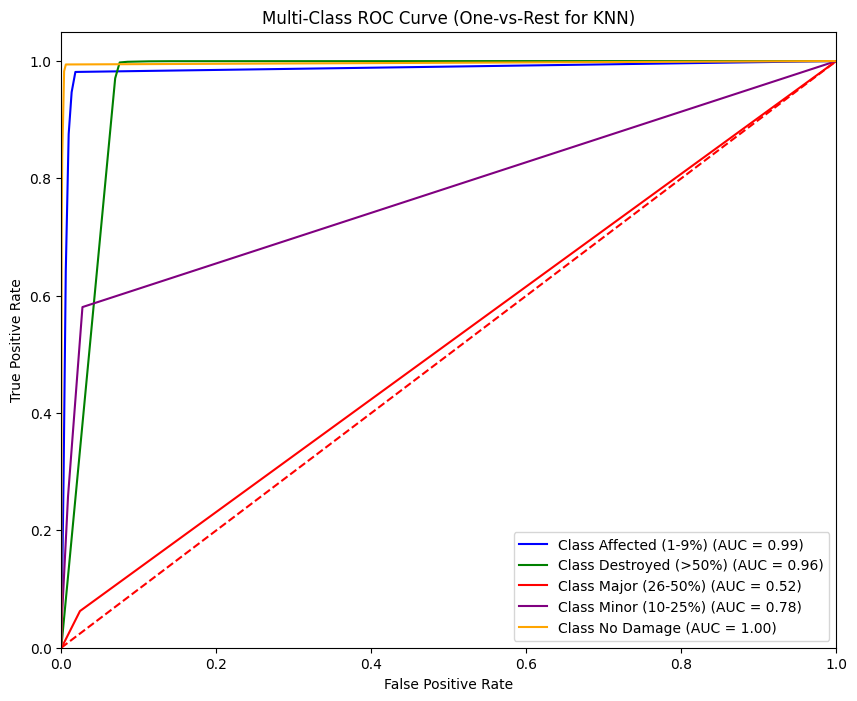

In [241]:
# 9. Plot ROC Curve for Multi-Class (One-vs-Rest)
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test1, classes=np.arange(len(le.classes_)))
y_scores = knn_optimal.predict_proba(X_test1)  # Probabilities for each class

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest for KNN)')
plt.legend(loc='lower right')
plt.show()

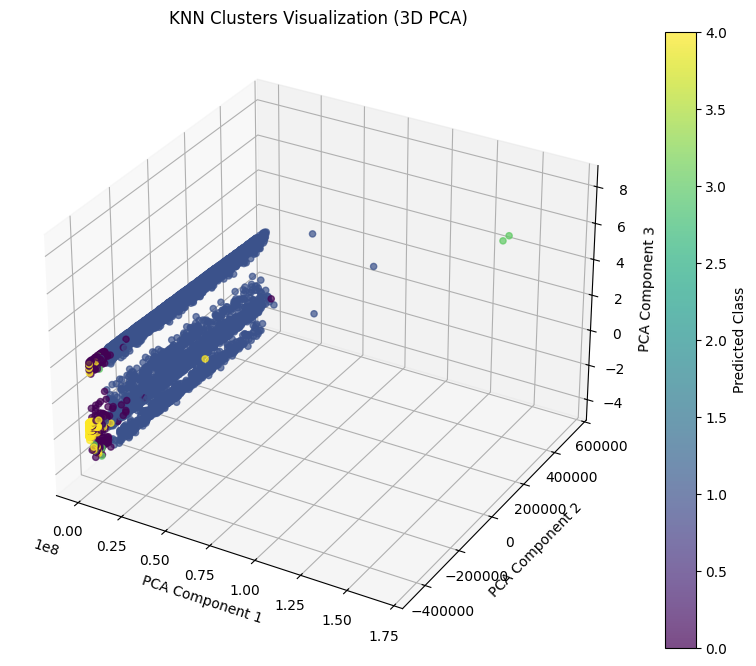

In [242]:
from mpl_toolkits.mplot3d import Axes3D

# 3D PCA
pca_3d_knn = PCA(n_components=3)
X_train_pca_3d = pca_3d_knn.fit_transform(X_train1)
X_test_pca_3d = pca_3d_knn.transform(X_test1)

# Train KNN in 3D space
knn_model_pca_3d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model_pca_3d.fit(X_train_pca_3d, y_train1)
y_pred_knn_pca_3d = knn_model_pca_3d.predict(X_test_pca_3d)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2], c=y_pred_knn_pca_3d, cmap='viridis', alpha=0.7)
ax.set_title("KNN Clusters Visualization (3D PCA)")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
fig.colorbar(scatter_3d, label='Predicted Class')
plt.show()


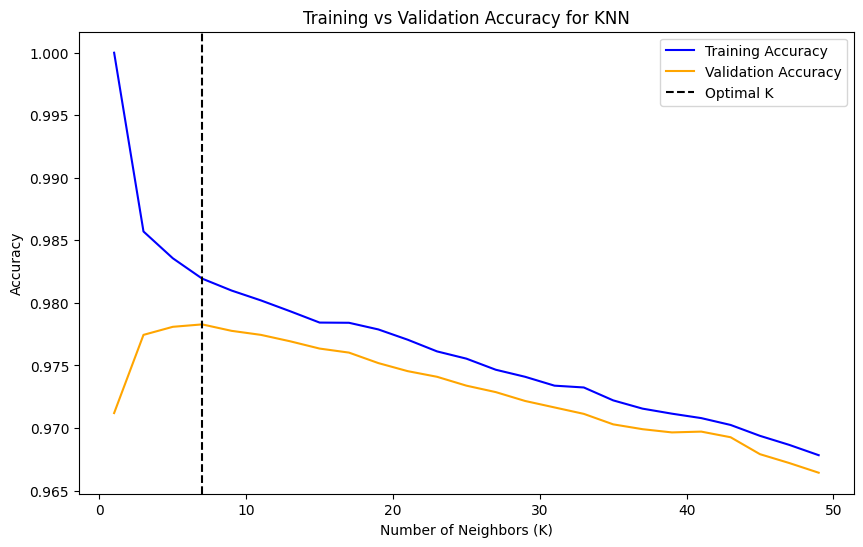

CPU times: total: 21min 51s
Wall time: 7min 39s


In [245]:
%%time

from sklearn.model_selection import StratifiedKFold
# Initialize variables
neighbors = list(range(1, 50, 2))  # Odd values for k
train_accuracies = []  # Store training accuracies
val_accuracies = []  # Store validation accuracies

# Stratified K-Fold for consistent splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over different values of k
for k in neighbors:
    train_scores = []
    val_scores = []

    for train_index, val_index in cv.split(X_train1, y_train1):
        X_train_fold, X_val_fold = X_train1.iloc[train_index], X_train1.iloc[val_index]
        y_train_fold, y_val_fold = y_train1.iloc[train_index], y_train1.iloc[val_index]

        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)

        # Evaluate on training and validation folds
        y_train_pred = knn.predict(X_train_fold)
        y_val_pred = knn.predict(X_val_fold)

        train_scores.append(accuracy_score(y_train_fold, y_train_pred))
        val_scores.append(accuracy_score(y_val_fold, y_val_pred))

    # Average scores for each k
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))

# Plot training and validation accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(neighbors, val_accuracies, label='Validation Accuracy', color='orange')
plt.axvline(x=neighbors[np.argmax(val_accuracies)], color='k', linestyle='--', label='Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for KNN')
plt.legend()
plt.show()


<a name="11"></a>
# 11 - Extra HDBSCan

In [246]:
pip install hdbscan

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 726.2/726.2 kB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [247]:
import hdbscan

In [305]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train1)

# Dimensionality Reduction (PCA to 2D)
pca_hdb = PCA(n_components=2)
X_pca_hdb = pca_hdb.fit_transform(X_scaled)

# Apply HDBSCAN clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10, cluster_selection_epsilon=0.1)
hdbscan_labels = hdbscan_model.fit_predict(X_pca_hdb)

# Extract damage categories directly from the original data
unique_damage_categories = cali_wildfire_without_feature['DAMAGE'].unique()

# Create a mapping of label indices to actual categories
label_to_name_map = dict(zip(sorted(np.unique(y_train1)), sorted(unique_damage_categories)))

# Convert numeric labels in y_train1 to readable damage categories
y_train1_readable = pd.Series(y_train1).map(label_to_name_map)

# Check if mapping worked
print(f"Label to Category Mapping: {label_to_name_map}")
print(f"Sample y_train1 Readable: {y_train1_readable.head()}")

Label to Category Mapping: {0: 'Affected (1-9%)', 1: 'Destroyed (>50%)', 2: 'Major (26-50%)', 3: 'Minor (10-25%)', 4: 'No Damage'}
Sample y_train1 Readable: 7279     Destroyed (>50%)
10871    Destroyed (>50%)
8099     Destroyed (>50%)
18693    Destroyed (>50%)
18340    Destroyed (>50%)
Name: DAMAGE_ENCODED, dtype: object


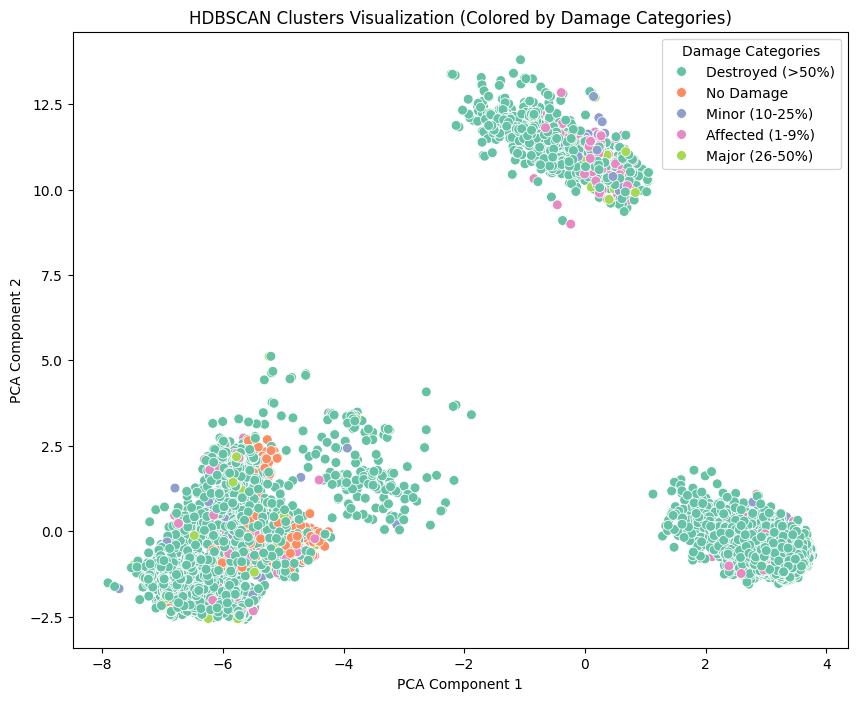

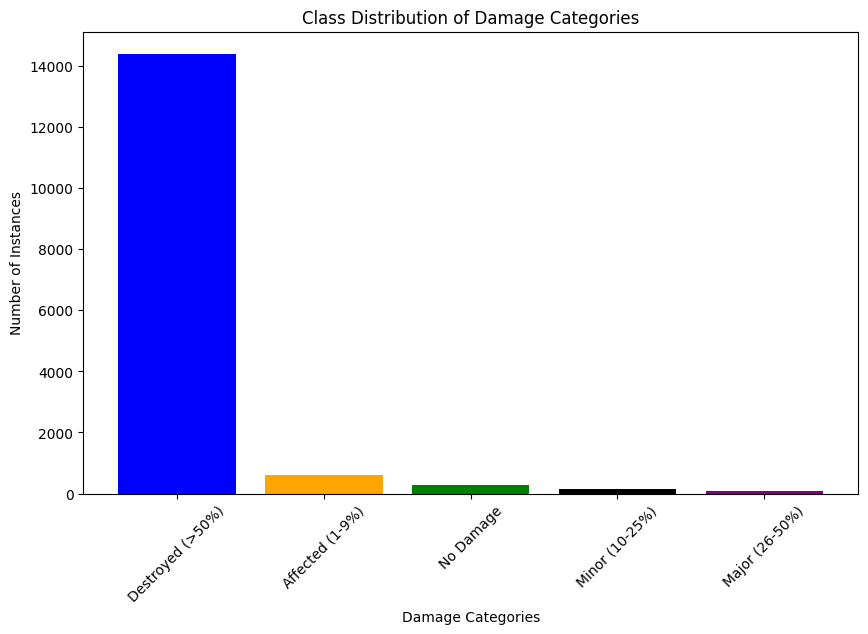

In [306]:
# Visualize HDBSCAN Clusters Colored by Actual Damage Categories
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_hdb[:, 0], y=X_pca_hdb[:, 1], hue=y_train1_readable, palette='Set2', legend='full', s=50)
plt.title("HDBSCAN Clusters Visualization (Colored by Damage Categories)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='upper right', title='Damage Categories')
plt.show()

# Bar Chart of Damage Categories Distribution
damage_category_distribution = y_train1_readable.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(damage_category_distribution.index, damage_category_distribution.values, color=['blue', 'orange', 'green', 'black', 'purple'])
plt.title('Class Distribution of Damage Categories')
plt.xlabel('Damage Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()